In [1]:
# IMPORTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATASET

df = pd.read_csv("DSA Case Study Dataset.csv")  
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (696840, 16)


,order_id,book_date,cancel_date,begin_use_date,end_use_date,refundable_indicator,country,profit_amount,base_cost,adult_count,child_count,infant_count,coupon_indicator,brand_name,device_type,product
0,6e0aa489-5bac-4ec0-b9d0-f65a8ba9abd9,22/05/2025,NaN,23/05/2025,24/05/2025,Not Refundable,USA,29.864218,159.446378,1,0,0,No Coupon Applied,yourota,Traditional Browser,Lodging
1,92ad8707-76af-457e-a73e-46511a3b2600,22/05/2025,NaN,22/05/2025,23/05/2025,Not Refundable,KOR,42.163668,220.506804,1,0,0,No Coupon Applied,ComfyHotels,Traditional Browser,Lodging
2,ddf3fcb4-bf6a-4a0a-a365-b6c782ebbd24,22/05/2025,NaN,31/05/2025,06/06/2025,Refundable,GBR,82.174219,515.042659,3,0,0,No Coupon Applied,YourOTA,Mobile App,Lodging
3,73927922-8be6-4908-9a4a-8d50d41da946,22/05/2025,NaN,24/09/2025,25/09/2025,Refundable,JPN,12.406415,201.303666,1,0,0,Coupon Applied,YourOTA,Traditional Browser,Lodging
4,69db632b-ee84-4cab-9b08-19abe3bceb4b,22/05/2025,NaN,17/03/2026,20/03/2026,Refundable,USA,82.104577,882.788580,3,0,0,No Coupon Applied,comfyhotels,Mobile App,Lodging


In [2]:
# Exploratory Data Analysis (EDA)

# 1. Show basic info about dataset
df.info()

# 2. Summary statistics for numeric columns
df.describe()

# 3. Check for missing values
df.isnull().sum()
  
# 4. Check for duplicate rows
df.duplicated().sum()

# 5. Look at unique values in key categorical columns
print("Brands:", df['brand_name'].unique())
print("Products:", df['product'].unique())
print("Device Types:", df['device_type'].unique())
print("Countries:", len(df['country'].unique()))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696840 entries, 0 to 696839
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              696840 non-null  object 
 1   book_date             696840 non-null  object 
 2   cancel_date           82961 non-null   object 
 3   begin_use_date        696840 non-null  object 
 4   end_use_date          696840 non-null  object 
 5   refundable_indicator  696840 non-null  object 
 6   country               696840 non-null  object 
 7   profit_amount         696840 non-null  float64
 8   base_cost             696840 non-null  float64
 9   adult_count           696840 non-null  int64  
 10  child_count           696840 non-null  int64  
 11  infant_count          696840 non-null  int64  
 12  coupon_indicator      696840 non-null  object 
 13  brand_name            696840 non-null  object 
 14  device_type           695805 non-null  object 
 15  

In [3]:
# Convert Dates → datetime format

df['book_date'] = pd.to_datetime(df['book_date'])
df['cancel_date'] = pd.to_datetime(df['cancel_date'], errors='coerce')
df['begin_use_date'] = pd.to_datetime(df['begin_use_date'])
df['end_use_date'] = pd.to_datetime(df['end_use_date'])


C:\Users\thego\AppData\Local\Temp\ipykernel_13332\2505893537.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['book_date'] = pd.to_datetime(df['book_date'])
C:\Users\thego\AppData\Local\Temp\ipykernel_13332\2505893537.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['cancel_date'] = pd.to_datetime(df['cancel_date'], errors='coerce')
C:\Users\thego\AppData\Local\Temp\ipykernel_13332\2505893537.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['begin_use_date'] = pd.to_datetime(df['begin_use_date'])
C:\Users\thego\AppData\Local\Temp\ipykernel_13332\2505893537.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=Fa

In [4]:
# Standardize Brand Names

df['brand_name'] = df['brand_name'].str.strip().str.lower()
df['brand_name'] = df['brand_name'].replace({
    'yourota': 'YourOTA',
    'comfyhotels': 'ComfyHotels',
    'vacationrentals4u': 'VacationRentals4U'
})


In [5]:
# Fix Product Names

df['product'] = df['product'].replace({
    'Air': 'Flight'
})


In [6]:
# Handle Missing Device Types

df['device_type'] = df['device_type'].fillna("Unknown")


In [7]:
# Create Trip Length Column

# Trip length (days):

df['trip_length'] = (df['end_use_date'] - df['begin_use_date']).dt.days


In [8]:
# Booking lead time (days before travel):

df['lead_time'] = (df['begin_use_date'] - df['book_date']).dt.days

In [9]:
# Step 1: Remove extreme outliers
df = df[df['profit_amount'] > -100000]   # drops -1,000,000 rows

# Step 2: Remove impossible traveler counts
df = df[(df['adult_count'] >= 0) & (df['child_count'] >= 0) & (df['infant_count'] >= 0)]

# Step 3: Remove records where base_cost <= 0
df = df[df['base_cost'] > 0]

# Step 4: Handle refundable 'Unknown' → mark as 'Unknown'
df['refundable_indicator'] = df['refundable_indicator'].replace({'Unknown': 'Other/Unknown'})


In [10]:


print(df['brand_name'].unique())
print(df['product'].unique())
df.info()


['YourOTA' 'ComfyHotels' 'VacationRentals4U']
['Lodging' 'Car' 'Flight' 'Activity' 'Insurance']
<class 'pandas.core.frame.DataFrame'>
Index: 424115 entries, 0 to 696839
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_id              424115 non-null  object        
 1   book_date             424115 non-null  datetime64[ns]
 2   cancel_date           2 non-null       datetime64[ns]
 3   begin_use_date        424115 non-null  datetime64[ns]
 4   end_use_date          424115 non-null  datetime64[ns]
 5   refundable_indicator  424115 non-null  object        
 6   country               424115 non-null  object        
 7   profit_amount         424115 non-null  float64       
 8   base_cost             424115 non-null  float64       
 9   adult_count           424115 non-null  int64         
 10  child_count           424115 non-null  int64         
 11  infant_count          4241

Total Bookings: 424115
Total Cancellations: 2
Cancellation Rate: 0.00%


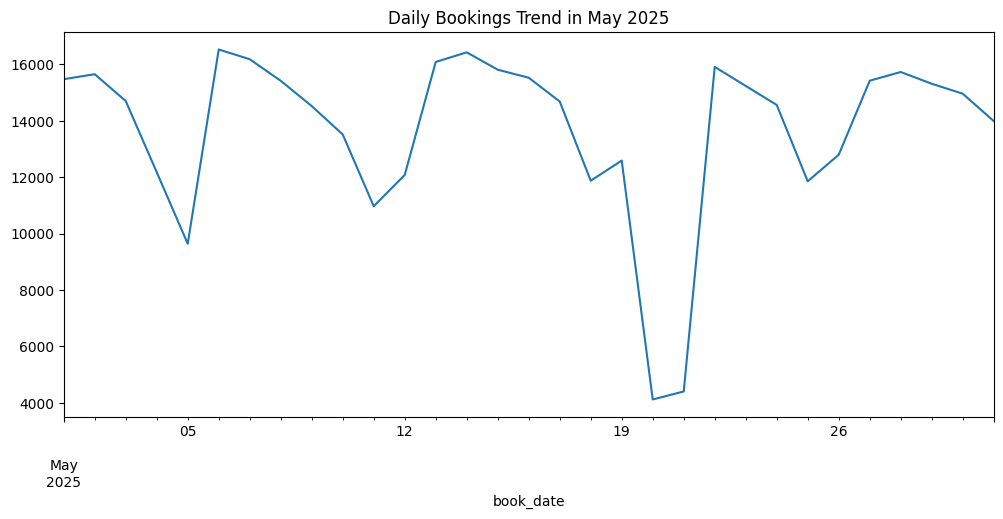

In [11]:
#Overall Booking Patterns

# Total bookings & cancellations
total_bookings = len(df)
total_cancellations = df['cancel_date'].notna().sum()
cancellation_rate = total_cancellations / total_bookings * 100

print("Total Bookings:", total_bookings)
print("Total Cancellations:", total_cancellations)
print("Cancellation Rate: {:.2f}%".format(cancellation_rate))

# Trend: Bookings by date
daily_bookings = df.groupby('book_date').size()
daily_bookings.plot(figsize=(12,5), title="Daily Bookings Trend in May 2025")
plt.show()


                   bookings  avg_profit  total_profit  cancellations  \
brand_name                                                             
ComfyHotels          152410   35.062971  5.343947e+06              2   
VacationRentals4U     17895   54.194921  9.698181e+05              0   
YourOTA              253810   53.749731  1.364222e+07              0   

                   cancellation_rate  
brand_name                            
ComfyHotels                 0.001312  
VacationRentals4U           0.000000  
YourOTA                     0.000000  


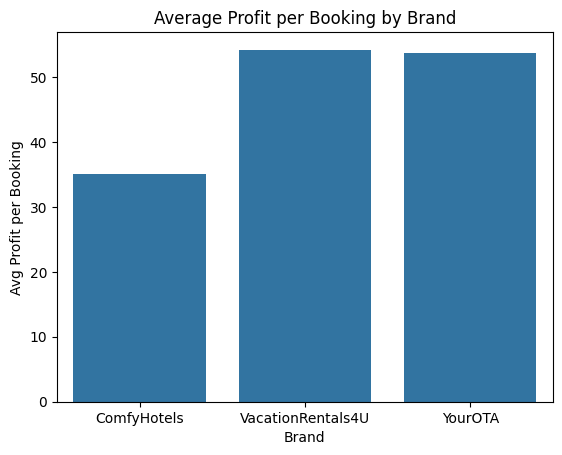

In [12]:
# Brand Profiling

# Bookings, Avg Profit, Cancellation Rate per Brand
brand_summary = df.groupby('brand_name').agg(
    bookings=('order_id','count'),
    avg_profit=('profit_amount','mean'),
    total_profit=('profit_amount','sum'),
    cancellations=('cancel_date', lambda x: x.notna().sum())
)

brand_summary['cancellation_rate'] = (brand_summary['cancellations'] /
                                      brand_summary['bookings'] * 100)

print(brand_summary)


# Reset index so brand_name becomes a column
brand_summary_reset = brand_summary.reset_index()

# Plot
sns.barplot(x='brand_name', y='avg_profit', data=brand_summary_reset)
plt.title("Average Profit per Booking by Brand")
plt.ylabel("Avg Profit per Booking")
plt.xlabel("Brand")
plt.show()



In [13]:
# Check profit distribution
df['profit_amount'].describe()

# Profit only for completed bookings (not canceled)
completed = df[df['cancel_date'].isna()]
brand_profit = completed.groupby('brand_name')['profit_amount'].mean()
print(brand_profit)


brand_name
ComfyHotels          35.061728
VacationRentals4U    54.194921
YourOTA              53.749731
Name: profit_amount, dtype: float64


In [14]:
# Device & Coupon Insights

# Device usage share
device_share = df['device_type'].value_counts(normalize=True) * 100
print(device_share)

# Coupon vs Non-Coupon profitability
coupon_summary = df.groupby('coupon_indicator')['profit_amount'].mean()
print(coupon_summary)


device_type
Traditional Browser    51.819436
Mobile App             34.663947
Mobile Site            13.103050
Agent Tool              0.220459
Unknown                 0.193108
Name: proportion, dtype: float64
coupon_indicator
Coupon Applied       42.396586
No Coupon Applied    47.150935
Name: profit_amount, dtype: float64


In [15]:
import pandas as pd

# ---------------------------
# 1. Traveler Segmentation
# ---------------------------
def traveler_segment(row):
    total_pax = row['adult_count'] + row['child_count'] + row['infant_count']
    if total_pax <= 1:
        return "Solo"
    elif total_pax == 2:
        return "Couple"
    elif 3 <= total_pax <= 4:
        return "Family"
    else:
        return "Group"

df['traveler_segment'] = df.apply(traveler_segment, axis=1)

# ---------------------------
# 2. Brand Summary
# ---------------------------
brand_summary = df.groupby('brand_name').agg(
    bookings=('order_id', 'count'),
    avg_profit=('profit_amount', 'mean'),
    total_profit=('profit_amount', 'sum'),
    cancellations=('cancel_date', 'count')
).reset_index()

brand_summary['cancellation_rate'] = (
    brand_summary['cancellations'] / brand_summary['bookings']
)

# ---------------------------
# 3. Segment Summary
# ---------------------------
segment_summary = df.groupby('traveler_segment').agg(
    bookings=('order_id', 'count'),
    avg_profit=('profit_amount', 'mean'),
    total_profit=('profit_amount', 'sum'),
    cancellations=('cancel_date', 'count')
).reset_index()

segment_summary['cancellation_rate'] = (
    segment_summary['cancellations'] / segment_summary['bookings']
)

# ---------------------------
# 4. Brand + Segment Summary
# ---------------------------
brand_segment_summary = df.groupby(['brand_name','traveler_segment']).agg(
    bookings=('order_id','count'),
    avg_profit=('profit_amount','mean'),
    total_profit=('profit_amount','sum'),
    cancellations=('cancel_date','count')
).reset_index()

brand_segment_summary['cancellation_rate'] = (
    brand_segment_summary['cancellations'] / brand_segment_summary['bookings']
)

# ---------------------------
# 5. Outputs
# ---------------------------
print("\n=== Brand Summary ===")
print(brand_summary.head())

print("\n=== Traveler Segment Summary ===")
print(segment_summary.head())

print("\n=== Brand + Segment Summary ===")
print(brand_segment_summary.head())



=== Brand Summary ===
          brand_name  bookings  avg_profit  total_profit  cancellations  \
0        ComfyHotels    152410   35.062971  5.343947e+06              2   
1  VacationRentals4U     17895   54.194921  9.698181e+05              0   
2            YourOTA    253810   53.749731  1.364222e+07              0   

   cancellation_rate  
0           0.000013  
1           0.000000  
2           0.000000  

=== Traveler Segment Summary ===
  traveler_segment  bookings  avg_profit  total_profit  cancellations  \
0           Couple    155204   40.314320  6.256944e+06              0   
1           Family     46382   53.911743  2.500534e+06              0   
2            Group      8892   84.918828  7.550982e+05              0   
3             Solo    213637   48.883893  1.044341e+07              2   

   cancellation_rate  
0           0.000000  
1           0.000000  
2           0.000000  
3           0.000009  

=== Brand + Segment Summary ===
          brand_name traveler_segmen

C:\Users\thego\AppData\Local\Temp\ipykernel_13332\3184754936.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='brand_name', y='profit_amount',


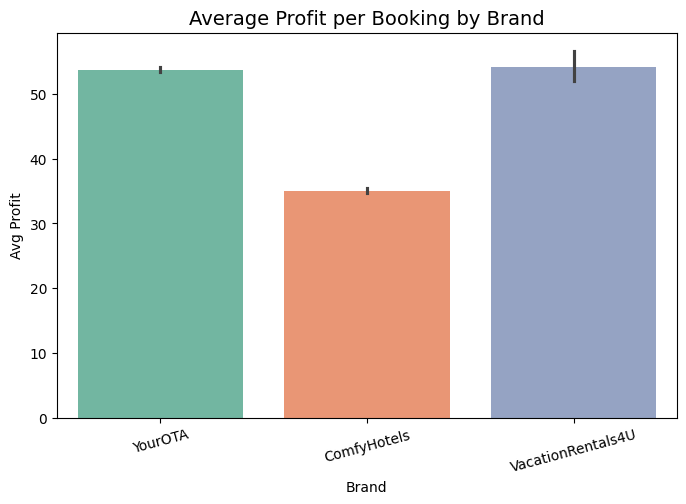

C:\Users\thego\AppData\Local\Temp\ipykernel_13332\3184754936.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='traveler_segment', y='profit_amount',


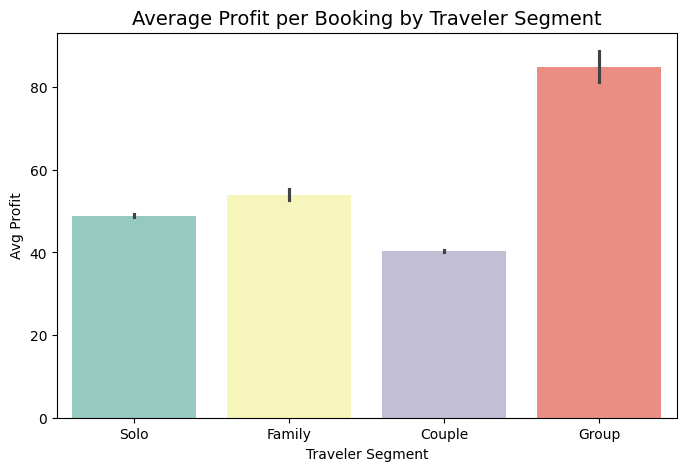

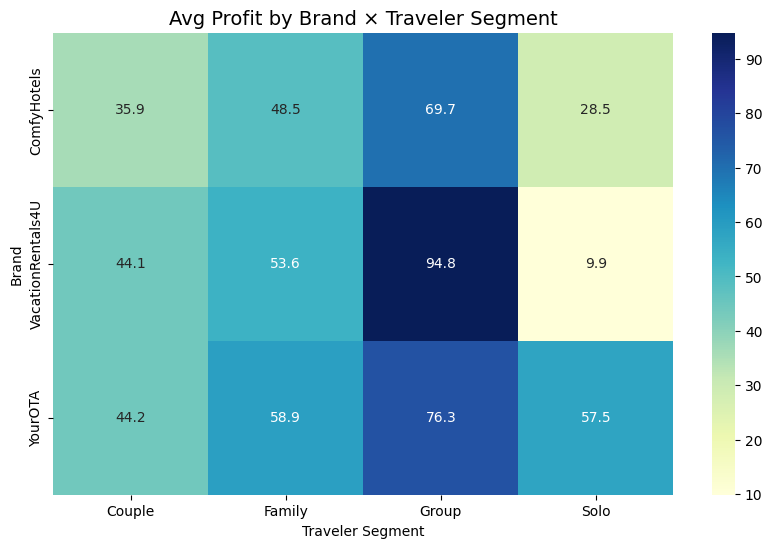

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Average profit per brand
plt.figure(figsize=(8,5))
sns.barplot(x='brand_name', y='profit_amount', 
            data=df, estimator=np.mean, palette="Set2")
plt.title("Average Profit per Booking by Brand", fontsize=14)
plt.ylabel("Avg Profit")
plt.xlabel("Brand")
plt.xticks(rotation=15)
plt.show()

# 2. Average profit per traveler segment
plt.figure(figsize=(8,5))
sns.barplot(x='traveler_segment', y='profit_amount', 
            data=df, estimator=np.mean, palette="Set3")
plt.title("Average Profit per Booking by Traveler Segment", fontsize=14)
plt.ylabel("Avg Profit")
plt.xlabel("Traveler Segment")
plt.show()

# 3. Heatmap: Avg Profit by Brand × Traveler Segment
pivot = df.pivot_table(index="brand_name", 
                       columns="traveler_segment", 
                       values="profit_amount", 
                       aggfunc="mean")

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Avg Profit by Brand × Traveler Segment", fontsize=14)
plt.ylabel("Brand")
plt.xlabel("Traveler Segment")
plt.show()


Correlation between trip length and profit: 0.257

Average profit by trip length bin:
trip_length_bin
1         18.234989
2-3       44.059944
4-7       82.133149
8-14     125.183368
15-30    170.725164
31+      191.110648
Name: profit_amount, dtype: float64

Average trip length by brand:
brand_name
ComfyHotels          2.073972
VacationRentals4U    5.750936
YourOTA              3.420945
Name: trip_length, dtype: float64

Average trip length by traveler segment:
traveler_segment
Couple    2.248415
Family    2.644388
Group     3.840756
Solo      3.658121
Name: trip_length, dtype: float64

Average trip length by brand and traveler segment:
traveler_segment     Couple    Family     Group      Solo
brand_name                                               
ComfyHotels        2.073514  2.251330  2.448740  2.003875
VacationRentals4U  6.069896  5.539519  5.023594  6.672966
YourOTA            2.161594  2.341843  2.512305  4.234085


C:\Users\thego\AppData\Local\Temp\ipykernel_13332\1796784426.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trip_bin_profit = df.groupby('trip_length_bin')['profit_amount'].mean()


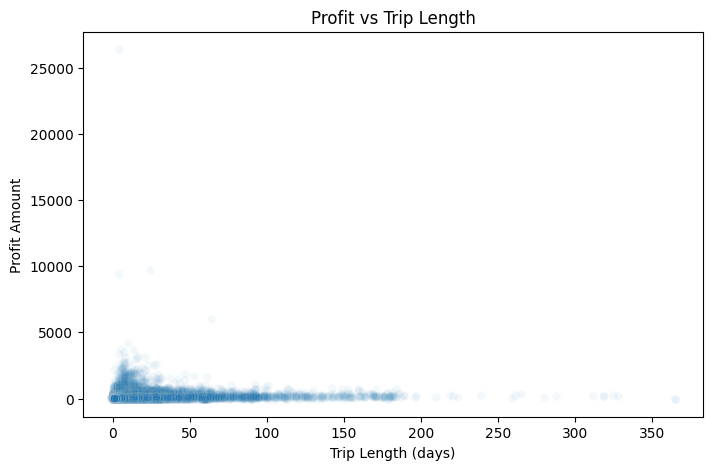

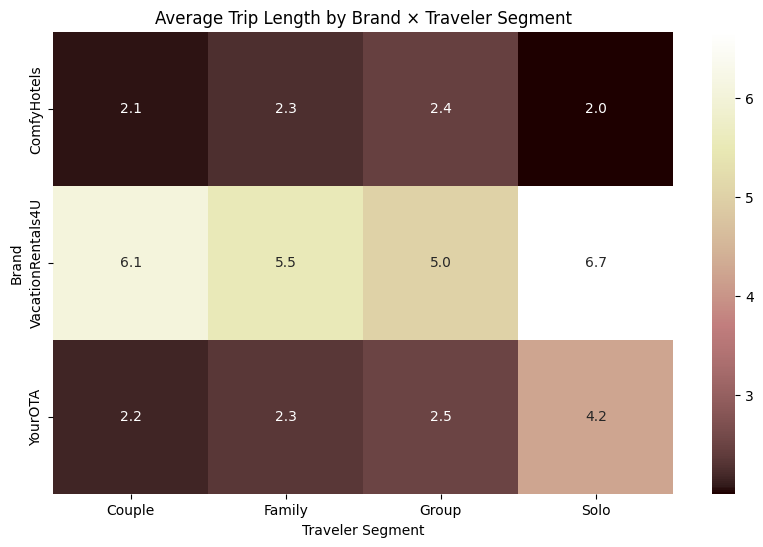

In [17]:
# Trip Length Profitability Analysis

# 1. Correlation between trip length and profit
trip_profit_corr = df['trip_length'].corr(df['profit_amount'])
print(f"Correlation between trip length and profit: {trip_profit_corr:.3f}")

# 2. Average profit by trip length (binned)
df['trip_length_bin'] = pd.cut(df['trip_length'], bins=[0,1,3,7,14,30,100], labels=['1','2-3','4-7','8-14','15-30','31+'])
trip_bin_profit = df.groupby('trip_length_bin')['profit_amount'].mean()
print("\nAverage profit by trip length bin:")
print(trip_bin_profit)

# 3. Average trip length by brand and traveler segment
brand_trip_length = df.groupby('brand_name')['trip_length'].mean()
segment_trip_length = df.groupby('traveler_segment')['trip_length'].mean()
brand_segment_trip_length = df.groupby(['brand_name','traveler_segment'])['trip_length'].mean().unstack()

print("\nAverage trip length by brand:")
print(brand_trip_length)
print("\nAverage trip length by traveler segment:")
print(segment_trip_length)
print("\nAverage trip length by brand and traveler segment:")
print(brand_segment_trip_length)

# 4. Visualization: Profit vs Trip Length
plt.figure(figsize=(8,5))
sns.scatterplot(x='trip_length', y='profit_amount', data=df, alpha=0.05)
plt.title("Profit vs Trip Length")
plt.xlabel("Trip Length (days)")
plt.ylabel("Profit Amount")
plt.show()

# 5. Visualization: Average Trip Length by Brand and Segment
plt.figure(figsize=(10,6))
sns.heatmap(brand_segment_trip_length, annot=True, fmt=".1f", cmap="pink")
plt.title("Average Trip Length by Brand × Traveler Segment")
plt.ylabel("Brand")
plt.xlabel("Traveler Segment")
plt.show()

               avg_profit  bookings  cancellations  cancellation_rate
lead_time_bin                                                        
Last-Minute     22.246330     67137              0            0.00000
Short           33.819126     70785              0            0.00000
Medium          44.545016    109398              0            0.00000
Long            64.943063    170983              2            0.00117


C:\Users\thego\AppData\Local\Temp\ipykernel_13332\1887331705.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lead_time_summary = df.groupby('lead_time_bin').agg(
C:\Users\thego\AppData\Local\Temp\ipykernel_13332\1887331705.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lead_time_summary.index, y='avg_profit', data=lead_time_summary, palette="coolwarm")


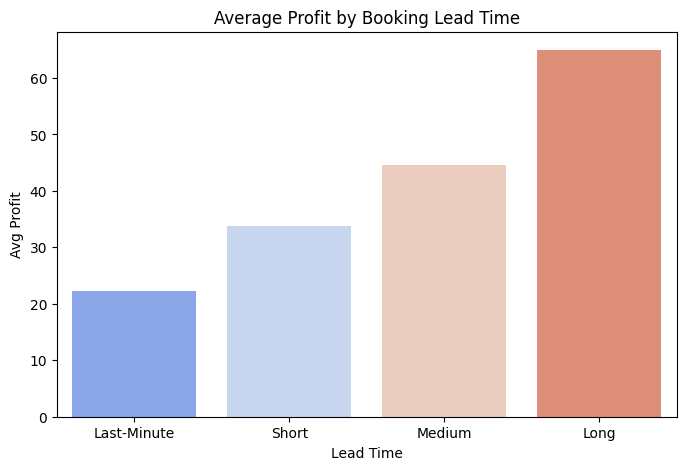

In [18]:
# Analyze profit and cancellation rates by lead time (last-minute vs. advance bookings)

# Define bins for lead time: last-minute (0-1 days), short (2-7), medium (8-30), long (31+)
df['lead_time_bin'] = pd.cut(df['lead_time'], bins=[-1,1,7,30,1000], labels=['Last-Minute','Short','Medium','Long'])

# Group by lead_time_bin
lead_time_summary = df.groupby('lead_time_bin').agg(
    avg_profit=('profit_amount', 'mean'),
    bookings=('order_id', 'count'),
    cancellations=('cancel_date', lambda x: x.notna().sum())
)
lead_time_summary['cancellation_rate'] = (lead_time_summary['cancellations'] / lead_time_summary['bookings']) * 100

print(lead_time_summary)

# Potential trend: Last-minute bookings tend to have different profit and cancellation rates compared to advance bookings.4
# Visualize lead time impact
plt.figure(figsize=(8,5))   
sns.barplot(x=lead_time_summary.index, y='avg_profit', data=lead_time_summary, palette="coolwarm")
plt.title("Average Profit by Booking Lead Time")
plt.xlabel("Lead Time")
plt.ylabel("Avg Profit")
plt.show()


Cancellation Rate by Brand:
          brand_name  cancellation_rate
0        ComfyHotels           0.000013
1  VacationRentals4U           0.000000
2            YourOTA           0.000000

Cancellation Rate by Traveler Segment:
  traveler_segment  cancellation_rate
0           Couple           0.000000
1           Family           0.000000
2            Group           0.000000
3             Solo           0.000009

Cancellation Rate by Brand and Traveler Segment:
           brand_name traveler_segment  cancellation_rate
0         ComfyHotels           Couple           0.000000
1         ComfyHotels           Family           0.000000
2         ComfyHotels            Group           0.000000
3         ComfyHotels             Solo           0.000034
4   VacationRentals4U           Couple           0.000000
5   VacationRentals4U           Family           0.000000
6   VacationRentals4U            Group           0.000000
7   VacationRentals4U             Solo           0.000000
8         

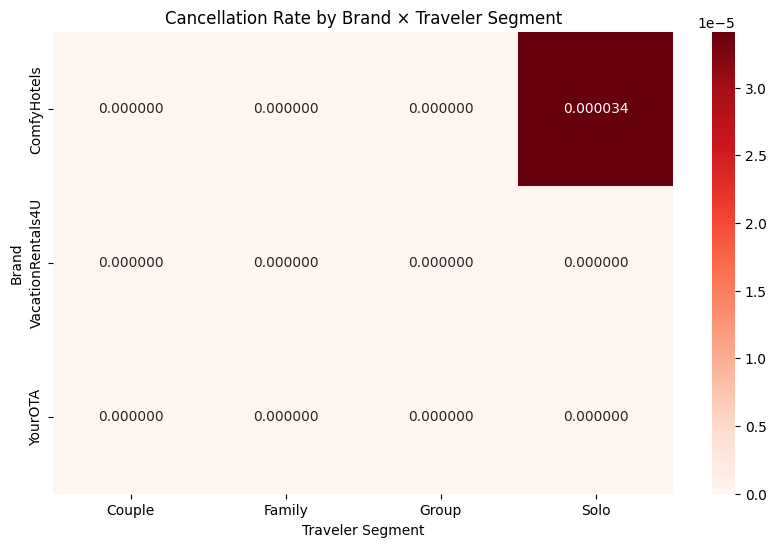

In [19]:
# Analyze cancellation rates by brand and traveler segment

# 1. Cancellation rate by brand
brand_cancel_rates = brand_summary[['brand_name', 'cancellation_rate']]
print("Cancellation Rate by Brand:")
print(brand_cancel_rates)

# 2. Cancellation rate by traveler segment
segment_cancel_rates = segment_summary[['traveler_segment', 'cancellation_rate']]
print("\nCancellation Rate by Traveler Segment:")
print(segment_cancel_rates)

# 3. Cancellation rate by brand and segment
brand_segment_cancel_rates = brand_segment_summary[['brand_name', 'traveler_segment', 'cancellation_rate']]
print("\nCancellation Rate by Brand and Traveler Segment:")
print(brand_segment_cancel_rates)

# visualize

pivot_cancel = brand_segment_summary.pivot(index="brand_name", columns="traveler_segment", values="cancellation_rate")
plt.figure(figsize=(10,6))
sns.heatmap(pivot_cancel, annot=True, fmt=".6f", cmap="Reds")
plt.title("Cancellation Rate by Brand × Traveler Segment")
plt.ylabel("Brand")
plt.xlabel("Traveler Segment")
plt.show()
